# Task-1

#### First Indicator - RSI
#### Second Indicator - MACD
#### (Roll No. - 230702)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## RSI Indicator

In [53]:
stock = "AAPL"

In [54]:
start_date = "2014-03-01"
end_date = "2018-12-01"

In [55]:
stockdata = yf.Ticker(stock)
data = stockdata.history(period='1d', start=start_date, end=end_date)

In [56]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-03-03 00:00:00-05:00,16.443280,16.670412,16.424117,16.579622,238781200,0.0,0.0
2014-03-04 00:00:00-05:00,16.681402,16.732922,16.579930,16.688940,259140000,0.0,0.0
2014-03-05 00:00:00-05:00,16.678894,16.799211,16.622659,16.724131,200062800,0.0,0.0
2014-03-06 00:00:00-05:00,16.737636,16.789472,16.590300,16.673550,185488800,0.0,0.0
2014-03-07 00:00:00-05:00,16.684232,16.712192,16.525900,16.663813,220729600,0.0,0.0
...,...,...,...,...,...,...,...
2018-11-26 00:00:00-05:00,41.699526,41.869443,40.747021,41.790466,179994000,0.0,0.0
2018-11-27 00:00:00-05:00,41.046171,41.826364,40.895401,41.699524,165549600,0.0,0.0
2018-11-28 00:00:00-05:00,42.295434,43.386743,41.864653,43.302982,184250000,0.0,0.0


In [57]:
data = data.reset_index()
data = data[['Date','Close']]
for index,row in data.iterrows():
    timestamp = datetime.fromisoformat(str(row['Date']))
    data.loc[index,'Date'] = timestamp.date()

C:\Users\SATWIK\AppData\Local\Temp\ipykernel_2268\3224035550.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2014-03-03' has dtype incompatible with datetime64[ns, America/New_York], please explicitly cast to a compatible dtype first.
  data.loc[index,'Date'] = timestamp.date()


In [58]:
for index,row in data.iterrows():
    if index==0:
        data.loc[index,'Profit'] = 0
        data.loc[index,'Loss'] = 0
    elif data.loc[index,'Close']>=data.loc[index-1,'Close']:
        data.loc[index,'Profit'] = data.loc[index,'Close'] - data.loc[index-1,'Close']
        data.loc[index,'Loss'] = 0
    else:
        data.loc[index,'Profit'] = 0
        data.loc[index,'Loss'] = data.loc[index-1,'Close'] - data.loc[index,'Close']

In [59]:
data

,Date,Close,Profit,Loss
0,2014-03-03,16.579622,0.000000,0.000000
1,2014-03-04,16.688940,0.109318,0.000000
2,2014-03-05,16.724131,0.035191,0.000000
3,2014-03-06,16.673550,0.000000,0.050581
4,2014-03-07,16.663813,0.000000,0.009737
...,...,...,...,...
1194,2018-11-26,41.790466,0.557625,0.000000
1195,2018-11-27,41.699524,0.000000,0.090942
1196,2018-11-28,43.302982,1.603458,0.000000
1197,2018-11-29,42.970318,0.000000,0.332664


In [60]:
profit,loss=0,0
for index,row in data.iterrows():
    profit+=row.Profit
    loss+=row.Loss
    if index<14: continue
    profit-=data.loc[index-14,'Profit']
    loss-=data.loc[index-14,'Loss']
    data.loc[index,'RSI'] = 100 - 100 / (1 + (profit/loss))

In [61]:
data

,Date,Close,Profit,Loss,RSI
0,2014-03-03,16.579622,0.000000,0.000000,NaN
1,2014-03-04,16.688940,0.109318,0.000000,NaN
2,2014-03-05,16.724131,0.035191,0.000000,NaN
3,2014-03-06,16.673550,0.000000,0.050581,NaN
4,2014-03-07,16.663813,0.000000,0.009737,NaN
...,...,...,...,...,...
1194,2018-11-26,41.790466,0.557625,0.000000,28.485912
1195,2018-11-27,41.699524,0.000000,0.090942,25.681631
1196,2018-11-28,43.302982,1.603458,0.000000,26.354518
1197,2018-11-29,42.970318,0.000000,0.332664,26.066826


In [62]:
rsi_overbought = 70
rsi_oversold = 30

In [63]:
data['Date'] = data['Date'].astype(str)

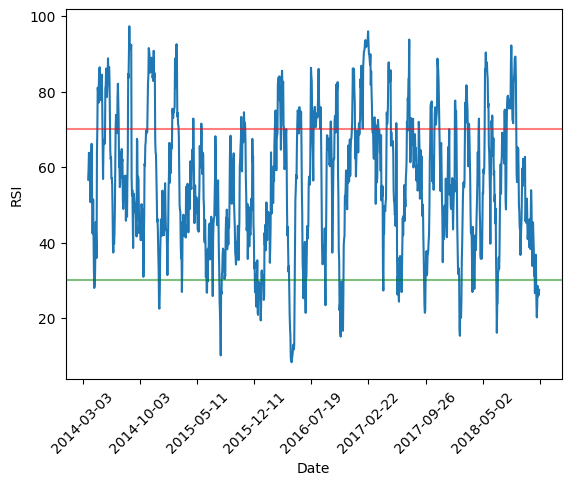

In [64]:
plt.plot(data.Date,data.RSI)
plt.axhline(y=rsi_oversold, xmin=0, xmax=1, color='green',alpha=0.5)
plt.axhline(y=rsi_overbought, xmin=0, xmax=1, color='red',alpha=0.5)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()

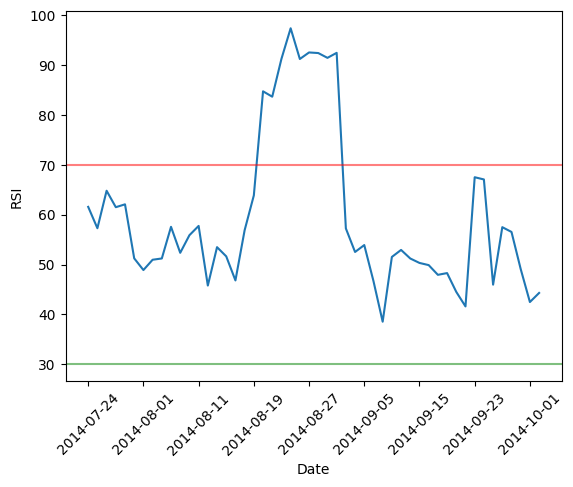

In [65]:
plt.plot(data.Date[100:150],data.RSI[100:150])
plt.axhline(y=rsi_overbought, xmin=0, xmax=1, color='red',alpha=0.5)
plt.axhline(y=rsi_oversold, xmin=0, xmax=1, color='green',alpha=0.5)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()

## MACD Indicator

In [66]:
stock = "AAPL"

In [67]:
start_date = "2019-04-05"
end_date = "2021-11-30"

In [68]:
stockdata = yf.Ticker(stock)
data = stockdata.history(period='1d', start=start_date, end=end_date)

In [69]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-04-05 00:00:00-04:00,47.216509,47.372738,47.091527,47.348701,74106400,0.0,0.0
2019-04-08 00:00:00-04:00,47.209299,48.125027,47.190071,48.093784,103526800,0.0,0.0
2019-04-09 00:00:00-04:00,48.146657,48.754739,47.884675,47.949570,143072800,0.0,0.0
2019-04-10 00:00:00-04:00,47.752477,48.247598,47.632302,48.218754,86781200,0.0,0.0
2019-04-11 00:00:00-04:00,48.274051,48.310102,47.694810,47.817387,83603200,0.0,0.0
...,...,...,...,...,...,...,...
2021-11-22 00:00:00-05:00,159.433594,163.397744,158.763050,158.782776,117467900,0.0,0.0
2021-11-23 00:00:00-05:00,158.881364,159.551924,156.849988,159.167343,96041900,0.0,0.0
2021-11-24 00:00:00-05:00,158.516504,159.887190,157.421926,159.689972,69463600,0.0,0.0


In [70]:
data = data.reset_index()
data = data[['Date','Close']]
for index,row in data.iterrows():
    timestamp = datetime.fromisoformat(str(row['Date']))
    data.loc[index,'Date'] = timestamp.date()

C:\Users\SATWIK\AppData\Local\Temp\ipykernel_2268\3224035550.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2019-04-05' has dtype incompatible with datetime64[ns, America/New_York], please explicitly cast to a compatible dtype first.
  data.loc[index,'Date'] = timestamp.date()


In [71]:
data

,Date,Close
0,2019-04-05,47.348701
1,2019-04-08,48.093784
2,2019-04-09,47.949570
3,2019-04-10,48.218754
4,2019-04-11,47.817387
...,...,...
664,2021-11-22,158.782776
665,2021-11-23,159.167343
666,2021-11-24,159.689972
667,2021-11-26,154.631256


In [72]:
t1 = 12
t2 = 26
t3 = 9

In [73]:
sum1,sum2,sum3 = 0,0,0
c1,c2 = f"{t1}_days_EMI",f"{t2}_days_EMI"
k1 = 2/(t1+1)
k2 = 2/(t2+1)
k3 = 2/(t3+1)

for index,row in data.iterrows():
    
    if index<t1: sum1+=row.Close
    elif index==t1: data.loc[index,c1] = sum1/t1
    else: data.loc[index,c1] = data.loc[index-1,c1] + (row.Close - data.loc[index-1,c1]) * k1  
        
    if index<t2: sum2+=row.Close
    elif index==t2:
        data.loc[index,c2] = sum2/t2
    else:
        data.loc[index,c2] = data.loc[index-1,c2] + (row.Close - data.loc[index-1,c2]) * k2 
        data.loc[index,'MACD'] = data.loc[index,c2] - data.loc[index,c1]
        sum3 += data.loc[index,'MACD']
        
    if index==t2+t3:
        data.loc[index,'Signal'] = sum3/t3
        data.loc[index,'Histogram'] = data.loc[index,'MACD'] - data.loc[index,'Signal']    
    elif index>t2+t3:
        data.loc[index,'Signal'] = data.loc[index-1,'Signal'] + (data.loc[index,'MACD'] - data.loc[index-1,'Signal']) * k3
        data.loc[index,'Histogram'] = data.loc[index,'MACD'] - data.loc[index,'Signal']    


In [74]:
data[t2+t3-1:]

,Date,Close,12_days_EMI,26_days_EMI,MACD,Signal,Histogram
34,2019-05-24,43.180862,45.228803,46.752190,1.523387,NaN,NaN
35,2019-05-28,43.002308,44.886266,46.474421,1.588156,1.248767,0.339389
36,2019-05-29,42.797237,44.564877,46.202037,1.637161,1.326446,0.310715
37,2019-05-30,43.019222,44.327084,45.966273,1.639190,1.388995,0.250195
38,2019-05-31,42.239891,44.005977,45.690245,1.684268,1.448049,0.236219
...,...,...,...,...,...,...,...
664,2021-11-22,158.782776,151.976143,149.201235,-2.774908,-1.711102,-1.063806
665,2021-11-23,159.167343,153.082482,149.939465,-3.143017,-1.997485,-1.145531
666,2021-11-24,159.689972,154.099019,150.661725,-3.437294,-2.285447,-1.151847
667,2021-11-26,154.631256,154.180901,150.955764,-3.225137,-2.473385,-0.751752


In [75]:
data['Date'] = data['Date'].astype(str)

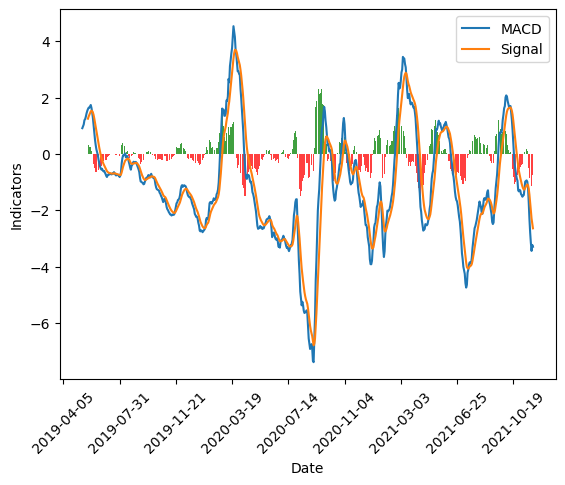

In [76]:
plt.plot(data.Date,data.MACD,label="MACD")
plt.plot(data.Date,data.Signal,label="Signal")
colors = ['green' if val >= 0 else 'red' for val in data['Histogram']]
plt.bar(data.Date,data.Histogram,color=colors,alpha=0.75)
plt.xlabel("Date")
plt.ylabel("Indicators")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.legend()
plt.show()

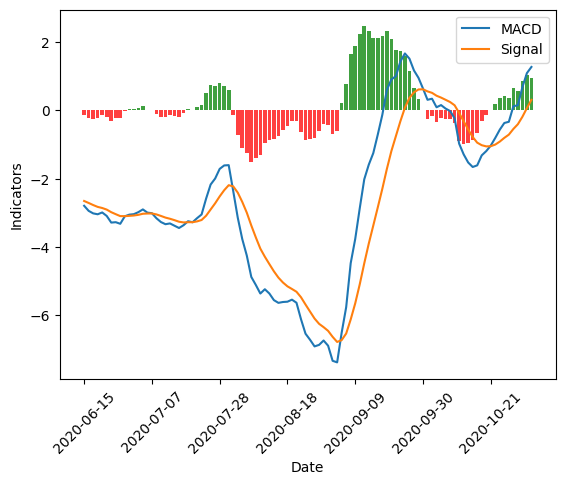

In [77]:
plt.plot(data.Date[300:400],data.MACD[300:400],label="MACD")
plt.plot(data.Date[300:400],data.Signal[300:400],label="Signal")
colors = ['green' if val >= 0 else 'red' for val in data['Histogram'][300:400]]
plt.bar(data.Date[300:400],data.Histogram[300:400],color=colors,alpha=0.75)
plt.xlabel("Date")
plt.ylabel("Indicators")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.legend()
plt.show()

# Task-2
### Bollinger Bands Strategy

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import statistics as stats

In [79]:
ticker = "^BSESN"
start_date = "2021-01-01"
end_date = "2024-01-01"
data = yf.Ticker(ticker).history(period='1d', start=start_date, end=end_date)

In [80]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-01 00:00:00+05:30,47785.281250,47984.359375,47771.148438,47868.980469,82700,0.0,0.0
2021-01-04 00:00:00+05:30,48109.171875,48220.468750,47594.468750,48176.800781,13900,0.0,0.0
2021-01-05 00:00:00+05:30,48037.628906,48486.238281,47903.378906,48437.781250,12200,0.0,0.0
2021-01-06 00:00:00+05:30,48616.660156,48616.660156,47864.140625,48174.058594,22500,0.0,0.0
2021-01-07 00:00:00+05:30,48524.359375,48558.339844,48037.871094,48093.320312,18400,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00+05:30,71045.648438,71259.546875,70713.562500,71106.960938,15300,0.0,0.0
2023-12-26 00:00:00+05:30,71097.781250,71471.289062,71012.078125,71336.796875,7700,0.0,0.0
2023-12-27 00:00:00+05:30,71492.023438,72119.851562,71473.648438,72038.429688,9800,0.0,0.0


In [81]:
data = data.reset_index()
data = data[['Date','Close']]
for index,row in data.iterrows():
    timestamp = datetime.fromisoformat(str(row['Date']))
    data.loc[index,'Date'] = timestamp.date()

C:\Users\SATWIK\AppData\Local\Temp\ipykernel_2268\3224035550.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2021-01-01' has dtype incompatible with datetime64[ns, Asia/Kolkata], please explicitly cast to a compatible dtype first.
  data.loc[index,'Date'] = timestamp.date()


In [82]:
data

,Date,Close
0,2021-01-01,47868.980469
1,2021-01-04,48176.800781
2,2021-01-05,48437.781250
3,2021-01-06,48174.058594
4,2021-01-07,48093.320312
...,...,...
735,2023-12-22,71106.960938
736,2023-12-26,71336.796875
737,2023-12-27,72038.429688
738,2023-12-28,72410.382812


In [83]:
data['Date'] = data['Date'].astype(str)

In [84]:
n_time = 20
n_std = 2
capital = 1000000

In [85]:
prices = list(data.Close[:n_time])

In [86]:
for index,row in data.iterrows():
    if index<n_time: continue;
    prices.append(row.Close)
    prices.pop(0)
    data.loc[index,'Lower Band'] = stats.mean(prices) - n_std * stats.stdev(prices)
    data.loc[index,'Middle Band'] = stats.mean(prices)
    data.loc[index,'Upper Band'] = stats.mean(prices) + n_std * stats.stdev(prices)

In [87]:
data = data.iloc[n_time:]
data = data.reset_index(drop=True)

In [88]:
data

,Date,Close,Lower Band,Middle Band,Upper Band
0,2021-02-01,48600.609375,46729.846791,48616.914648,50503.982505
1,2021-02-02,49797.718750,46752.163534,48697.960547,50643.757559
2,2021-02-03,50255.750000,46727.798309,48788.858984,50849.919660
3,2021-02-04,50614.289062,46718.330910,48910.870508,51103.410106
4,2021-02-05,50731.628906,46742.530520,49042.785937,51343.041355
...,...,...,...,...,...
715,2023-12-22,71106.960938,65841.130178,69348.541016,72855.951854
716,2023-12-26,71336.796875,66387.639052,69616.878906,72846.118761
717,2023-12-27,72038.429688,66942.710150,69910.090234,72877.470318
718,2023-12-28,72410.382812,67375.362800,70185.514063,72995.665325


## Strategy:
### Go long when the price hits the lower band and close the position when the price hits the upper band.

In [89]:
for index,row in data.iterrows():
    
    if index==0:
        data.loc[0,'Position'] = 0
        data.loc[0,'Shares'] = 0
        data.loc[0,'Signal'] = 0
        data.loc[0,'Daily Return'] = 0
        data.loc[0,'Investment'] = 0
        data.loc[0,'Net Return'] = 0
        data.loc[0,'Portfolio Value'] = 0
        continue
        
    if data.loc[index-1,'Position']==0 and row['Close'] < row['Lower Band']:
        data.loc[index,'Position'] = 1
        data.loc[index,'Shares'] = capital//row.Close
        data.loc[index,'Signal'] = 1
        data.loc[index,'Daily Return'] = 0
        data.loc[index,'Investment'] = (capital//row.Close)*(row.Close)
        data.loc[index,'Net Return'] = data.loc[index-1,'Net Return']
        data.loc[index,'Portfolio Value'] = data.loc[index,'Shares'] * row.Close
        
    elif data.loc[index-1,'Position']==1 and (row['Close']>row['Upper Band'] or index==len(data)-1):
        data.loc[index,'Position'] = 0
        data.loc[index,'Shares'] = 0
        data.loc[index,'Signal'] = -1
        data.loc[index,'Daily Return'] = data.loc[index-1,'Shares']*row.Close - data.loc[index-1,'Investment']
        data.loc[index,'Investment'] = 0
        data.loc[index,'Net Return'] = data.loc[index-1,'Net Return'] + data.loc[index,'Daily Return']
        data.loc[index,'Portfolio Value'] = data.loc[index,'Shares'] * row.Close

    else:
        data.loc[index,'Position'] = data.loc[index-1,'Position']
        data.loc[index,'Shares'] = data.loc[index-1,'Shares']
        data.loc[index,'Signal'] = 0
        data.loc[index,'Daily Return'] = 0
        data.loc[index,'Investment'] = data.loc[index-1,'Investment']
        data.loc[index,'Net Return'] = data.loc[index-1,'Net Return']
        data.loc[index,'Portfolio Value'] = data.loc[index,'Shares'] * row.Close


In [90]:
data['Close'] = data['Close'].round(2)
data['Lower Band'] = data['Lower Band'].round(2)
data['Middle Band'] = data['Middle Band'].round(2)
data['Upper Band'] = data['Upper Band'].round(2)
data['Position'] = data['Position'].astype(int)
data['Shares'] = data['Shares'].astype(int)
data['Signal'] = data['Signal'].astype(int)
data['Daily Return'] = data['Daily Return'].round(2)
data['Investment'] = data['Investment'].round(2)
data['Net Return'] = data['Net Return'].round(2)
data['Portfolio Value'] = data['Portfolio Value'].round(2)

In [91]:
data[data['Signal']!=0]

,Date,Close,Lower Band,Middle Band,Upper Band,Position,Shares,Signal,Daily Return,Investment,Net Return,Portfolio Value
37,2021-03-25,48440.12,48593.61,50179.94,51766.27,1,20,1,0.00,968802.42,0.00,968802.42
69,2021-05-18,50193.33,47464.39,48826.01,50187.62,0,0,-1,35064.14,0.00,35064.14,0.00
197,2021-11-22,58465.89,58903.57,60233.53,61563.48,1,17,1,0.00,993920.14,35064.14,993920.14
228,2022-01-04,59855.93,55924.55,57853.38,59782.21,0,0,-1,23630.66,0.00,58694.80,0.00
264,2022-02-24,54529.91,55724.62,57852.93,59981.24,1,18,1,0.00,981538.38,58694.80,981538.38
355,2022-07-08,54481.84,51147.67,52797.85,54448.03,0,0,-1,-865.27,0.00,57829.54,0.00
408,2022-09-26,57145.22,57568.33,59226.12,60883.91,1,17,1,0.00,971468.72,57829.54,971468.72
452,2022-11-30,63099.65,60312.04,61656.96,63001.88,0,0,-1,101225.30,0.00,159054.84,0.00
467,2022-12-21,61067.24,61199.86,62334.18,63468.51,1,16,1,0.00,977075.81,159054.84,977075.81
556,2023-05-04,61749.25,58854.99,60224.81,61594.62,0,0,-1,10912.19,0.00,169967.03,0.00
